<a href="https://colab.research.google.com/github/YeeunKang99/ITB2022/blob/main/ITB_%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IT와 비즈니스 혁신-분류과제**

2020년도 건강검진정보 샘플(1만건) 데이터를 이용히야 최적의 분류 모델을 만들고 평가 결과 및 도출된 인사이트를 보여주시오. 

(1) 흥미로운 분류 문제 선정: 종속/독립 변수 선택 
   - 수치 데이터를 범주형으로 변경 가능 (예. 이진 클래스로 변경: 0.5 이상 Y, 0.5 미만 N)
   - 건강검진 데이터에 다른 외부 데이터를 연결해서 이용도 가능
   - 필요한 경우 데이터 전처리 및 파생변수 생성 
(2) 최적의 분류 모델 선택 (분류 기법, 파라미터) 및 평가 결과 
   - 적절한 평가 방법 1개 선택 
   - 분류 모델의 종류는 3개 이하로 선택, 수업시간에 배우지 않은 분류 모델도 사용 가능 
(3) 분류 모델을 통한 인사이트 도출:  중요 변수 설명 등  
(4) 코드는 github에 올리고 주소 제출

## **주제:** 고혈압 의심&고혈압 vs 정상혈압&저혈압 분류하는 모델만들기
### **목적:** 수축기혈압과 이완기혈압으로 고혈압을 진단할 수 있지만, 건강검진 데이터의 다른 변수를 통해 고혈압을 예측함으로써 고혈압의 진단 또는 예방에 있어 중요한 데이터(변수)가 무엇인지 알아보고자 한다.


In [ ]:
# 간단하게 그림을 그릴 수 있는 mglearn 라이브러리 사용 (!pip install mglearn 명령어로 설치)
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mglearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

## **데이터 탐색 & 전처리**

In [ ]:
# 데이터 가져오기
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv", encoding = 'utf-8', index_col='가입자일련번호')

display(health.head()) 
print(health.info()) 

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
2,2020,27,F,13,150,65,81.0,0.8,0.8,1,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
3,2020,11,F,12,155,55,70.0,0.6,0.7,1,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
4,2020,31,M,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
5,2020,41,F,12,155,50,75.2,1.5,1.2,1,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   시도코드         10000 non-null  int64  
 2   성별코드         10000 non-null  object 
 3   연령대코드(5세단위)  10000 non-null  int64  
 4   신장(5Cm단위)    10000 non-null  int64  
 5   체중(5Kg 단위)   10000 non-null  int64  
 6   허리둘레         10000 non-null  float64
 7   시력(좌)        10000 non-null  float64
 8   시력(우)        10000 non-null  float64
 9   청력(좌)        10000 non-null  int64  
 10  청력(우)        10000 non-null  int64  
 11  수축기혈압        9912 non-null   float64
 12  이완기혈압        9912 non-null   float64
 13  식전혈당(공복혈당)   9912 non-null   float64
 14  총콜레스테롤       4044 non-null   float64
 15  트리글리세라이드     4044 non-null   float64
 16  HDL콜레스테롤     4044 non-null   float64
 17  LDL콜레스테롤     3977 non-null   float64
 18  혈색소          9912 non-null   float64
 19  요단백 

In [ ]:
# 기준년도, 데이터공개일자 삭제
health1 = health.drop(["기준년도", "데이터공개일자"], axis = 1)
health1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시도코드         10000 non-null  int64  
 1   성별코드         10000 non-null  object 
 2   연령대코드(5세단위)  10000 non-null  int64  
 3   신장(5Cm단위)    10000 non-null  int64  
 4   체중(5Kg 단위)   10000 non-null  int64  
 5   허리둘레         10000 non-null  float64
 6   시력(좌)        10000 non-null  float64
 7   시력(우)        10000 non-null  float64
 8   청력(좌)        10000 non-null  int64  
 9   청력(우)        10000 non-null  int64  
 10  수축기혈압        9912 non-null   float64
 11  이완기혈압        9912 non-null   float64
 12  식전혈당(공복혈당)   9912 non-null   float64
 13  총콜레스테롤       4044 non-null   float64
 14  트리글리세라이드     4044 non-null   float64
 15  HDL콜레스테롤     4044 non-null   float64
 16  LDL콜레스테롤     3977 non-null   float64
 17  혈색소          9912 non-null   float64
 18  요단백          9861 non-null   float64
 19  혈청크레

In [ ]:
# 변수명 영어로 변경해서 heal에 저장
heal = health1.rename(columns = {"시도코드":"SIDO", "성별코드":"SEX","연령대코드(5세단위)":"AGE_GROUP", "신장(5Cm단위)":"HEIGHT", "체중(5Kg 단위)":"WEIGHT",
                                "허리둘레":"WAIST", "시력(좌)":"SIGHT_LEFT", "시력(우)":"SIGHT_RIGHT", "청력(좌)":"HEAR_LEFT","청력(우)":"HEAR_RIGHT",
                                "수축기혈압":"BP_HIGH", "이완기혈압":"BP_LWST", "식전혈당(공복혈당)":"BLDS", "총콜레스테롤":"TOT_CHOLE",
                                "트리글리세라이드":"TRIGLYCERIDE", "HDL콜레스테롤":"HDL_CHOLE", "LDL콜레스테롤":"LDL_CHOLE", "혈색소":"HMG",
                                "요단백":"OLIG_PROTE_CD", "혈청크레아티닌":"CREATININE", "(혈청지오티)AST":"SGOT_AST", "(혈청지오티)ALT":"SGPT_ALT",
                                "감마지티피":"GAMMA_GTP", "흡연상태":"SMK", '음주여부':"DRK", "구강검진수검여부":"DENTAL", "치아우식증유무":"CRS",
                                "치석":"TTR"})
heal.columns.tolist() 

['SIDO',
 'SEX',
 'AGE_GROUP',
 'HEIGHT',
 'WEIGHT',
 'WAIST',
 'SIGHT_LEFT',
 'SIGHT_RIGHT',
 'HEAR_LEFT',
 'HEAR_RIGHT',
 'BP_HIGH',
 'BP_LWST',
 'BLDS',
 'TOT_CHOLE',
 'TRIGLYCERIDE',
 'HDL_CHOLE',
 'LDL_CHOLE',
 'HMG',
 'OLIG_PROTE_CD',
 'CREATININE',
 'SGOT_AST',
 'SGPT_ALT',
 'GAMMA_GTP',
 'SMK',
 'DRK',
 'DENTAL',
 'CRS',
 'TTR']

In [ ]:
import numpy as np

In [ ]:
# GAMMA_GTP(감마지티피) 조건에 따라서 범주형 GAMMAGTP에 저장
# 이유1: 여성과 남성에 따라 정상 수치 기준에 차이가 있으므로 정상(Yes), 비정상(No)로 나누기
# 이유2: 전처리하지 않고 의사결정 나무를 만들었을 때 감마지티피가 중요한 변수로 사용되지만 성별은 모델의 독립변인으로 사용되지 않았다.
# 그래서 성별에 따라 정상수치의 범위가 다르다는 감마지티피의 특성을 반영하기 위해서 전처리를 할 필요성을 느꼈다.
# 정상치 남성 11~63IU/L, 여성 8~35IU/L

heal["GAMMAGTP"] = np.where((heal["SEX"] == "M") & (heal["GAMMA_GTP"] < 64) & (heal["GAMMA_GTP"] > 11), "Yes", (np.where((heal["SEX"] == "F") & (heal["GAMMA_GTP"] < 36) & (heal["GAMMA_GTP"] > 8),"Yes", "No")))
print(heal["GAMMAGTP"].value_counts())


Yes    8135
No     1865
Name: GAMMAGTP, dtype: int64


In [ ]:
# 기존  GAMMA_GTP(감마지티피)변수 삭제
heal = heal.drop(["GAMMA_GTP"], axis = 1)

In [ ]:
#### 범주형 데이터 전처리
# 범주형 데이터:SIDO, SEX, SMK, DRK, DENTAL, CRS, TTR
# SIDO와 달리 AGE_GROUP는 1~18까지의 숫자가 이어져 있으므로 변경하지 않음

# 1. 범주형 데이터 분리
category = heal.loc[:, ["SIDO", "SEX", "SMK", "DRK", "DENTAL", "CRS", "TTR", "GAMMAGTP"]]
category.head(10)

,SIDO,SEX,SMK,DRK,DENTAL,CRS,TTR,GAMMAGTP
가입자일련번호,,,,,,,,
1,36,M,No,No,0,NaN,NaN,Yes
2,27,F,No,No,0,NaN,NaN,Yes
3,11,F,No,No,0,NaN,NaN,No
4,31,M,No,No,1,0.0,0.0,No
5,41,F,No,No,0,NaN,NaN,Yes
6,27,M,Yes,Yes,0,NaN,NaN,Yes
7,44,M,Yes,Yes,1,0.0,1.0,Yes
8,41,M,Yes,No,1,0.0,2.0,Yes
9,41,F,No,No,0,NaN,NaN,No


In [ ]:
# 2. 범주형 데이터 -> 더미 변수 생성
dummy = pd.get_dummies(category, columns = ["SIDO", "SEX", "SMK", "DRK", "DENTAL", "CRS", "TTR", "GAMMAGTP"])
print(dummy.info())
display(dummy)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SIDO_11       10000 non-null  uint8
 1   SIDO_26       10000 non-null  uint8
 2   SIDO_27       10000 non-null  uint8
 3   SIDO_28       10000 non-null  uint8
 4   SIDO_29       10000 non-null  uint8
 5   SIDO_30       10000 non-null  uint8
 6   SIDO_31       10000 non-null  uint8
 7   SIDO_36       10000 non-null  uint8
 8   SIDO_41       10000 non-null  uint8
 9   SIDO_42       10000 non-null  uint8
 10  SIDO_43       10000 non-null  uint8
 11  SIDO_44       10000 non-null  uint8
 12  SIDO_45       10000 non-null  uint8
 13  SIDO_46       10000 non-null  uint8
 14  SIDO_47       10000 non-null  uint8
 15  SIDO_48       10000 non-null  uint8
 16  SIDO_49       10000 non-null  uint8
 17  SEX_F         10000 non-null  uint8
 18  SEX_M         10000 non-null  uint8
 19  SMK_No        10000 non-n

,SIDO_11,SIDO_26,SIDO_27,SIDO_28,SIDO_29,SIDO_30,SIDO_31,SIDO_36,SIDO_41,SIDO_42,...,DRK_Yes,DENTAL_0,DENTAL_1,CRS_0.0,CRS_1.0,TTR_0.0,TTR_1.0,TTR_2.0,GAMMAGTP_No,GAMMAGTP_Yes
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,1,0
5,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
9997,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,0,0,0,1
9998,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
# 3. 범주형 데이터를 제외한 기존의 데이터와 더미화한 범주형 데이터 합쳐서 data만들기
# heal에서 범주형 데이터 제외한 데이터 프레임 만들기(no_category)
no_category = heal.drop(["SIDO", "SEX", "SMK", "DRK", "DENTAL", "CRS", "TTR", "GAMMAGTP"], axis = 1)

# 두 데이터 프레임 합치기
data = pd.concat([no_category, dummy], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AGE_GROUP      10000 non-null  int64  
 1   HEIGHT         10000 non-null  int64  
 2   WEIGHT         10000 non-null  int64  
 3   WAIST          10000 non-null  float64
 4   SIGHT_LEFT     10000 non-null  float64
 5   SIGHT_RIGHT    10000 non-null  float64
 6   HEAR_LEFT      10000 non-null  int64  
 7   HEAR_RIGHT     10000 non-null  int64  
 8   BP_HIGH        9912 non-null   float64
 9   BP_LWST        9912 non-null   float64
 10  BLDS           9912 non-null   float64
 11  TOT_CHOLE      4044 non-null   float64
 12  TRIGLYCERIDE   4044 non-null   float64
 13  HDL_CHOLE      4044 non-null   float64
 14  LDL_CHOLE      3977 non-null   float64
 15  HMG            9912 non-null   float64
 16  OLIG_PROTE_CD  9861 non-null   float64
 17  CREATININE     9912 non-null   float64
 18  SGOT_A

### 파생변수
#### BP_HIGH(수축기혈압)과 BP_LWST(이완기혈압)을 이용하여 파생변수 만들기
*  아래의 기준 따라 파생변수를 만들 것
*  파생변수
 * 정상혈압(저혈압, 고혈압 전단계1기 포함) 또는 고혈압(고혈압 전단계 2기, 고혈압 등 모두 포함)
 * 정상혈압 => N, 고혈압 => Y
*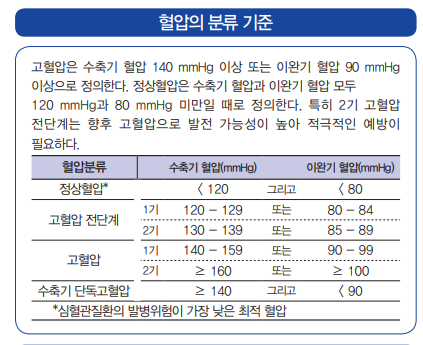

* 출처: 고혈압 가이드라인 일차 의료용 요약 정보(임상진료지침정보센터, 2018)


In [ ]:
import numpy as np

In [ ]:
# 먼저 BP_HIGH(수축기혈압), BP_LWST(이완기혈압) 하나라도 결측지 있는 행 제거하여 새로운 데이터프레임 만들기
df = data.dropna(subset = ['BP_HIGH', 'BP_LWST'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9912 entries, 1 to 10000
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AGE_GROUP      9912 non-null   int64  
 1   HEIGHT         9912 non-null   int64  
 2   WEIGHT         9912 non-null   int64  
 3   WAIST          9912 non-null   float64
 4   SIGHT_LEFT     9912 non-null   float64
 5   SIGHT_RIGHT    9912 non-null   float64
 6   HEAR_LEFT      9912 non-null   int64  
 7   HEAR_RIGHT     9912 non-null   int64  
 8   BP_HIGH        9912 non-null   float64
 9   BP_LWST        9912 non-null   float64
 10  BLDS           9912 non-null   float64
 11  TOT_CHOLE      4044 non-null   float64
 12  TRIGLYCERIDE   4044 non-null   float64
 13  HDL_CHOLE      4044 non-null   float64
 14  LDL_CHOLE      3977 non-null   float64
 15  HMG            9912 non-null   float64
 16  OLIG_PROTE_CD  9861 non-null   float64
 17  CREATININE     9912 non-null   float64
 18  SGOT_AS

In [ ]:
# 결측치 전처리
df = data.dropna(subset = ['OLIG_PROTE_CD'])

# df1: 결측치 1000개 이상인 열 제거한 데이터 프레임, df2: 결측치 있는 행 제거한 데이터(데이터의 수가 많이 적어짐)
df1 = df.drop(["TOT_CHOLE", "TRIGLYCERIDE", "HDL_CHOLE", "LDL_CHOLE"], axis = 1)
df2 = df.dropna(axis=0)

In [ ]:
# 파생변수 만들기
df1["HYPERTENSION"] = np.where((df1["BP_HIGH"] < 130) & (df1["BP_LWST"] < 85), "N", "Y")
df2["HYPERTENSION"] = np.where((df2["BP_HIGH"] < 130) & (df2["BP_LWST"] < 85), "N", "Y")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df1[["BP_HIGH","BP_LWST","HYPERTENSION"]].head()

,BP_HIGH,BP_LWST,HYPERTENSION
가입자일련번호,,,
1,127.0,79.0,N
2,110.0,73.0,N
3,123.0,80.0,N
4,134.0,84.0,Y
5,144.0,89.0,Y


In [ ]:
# 파생변수 만들 때 사용했던 BP_HIGH(수축기혈압), BP_LWST(이완기혈압) 제거
df1 = df1.drop(["BP_HIGH", "BP_LWST"], axis = 1)
df2 = df2.drop(["BP_HIGH", "BP_LWST"], axis = 1)

In [ ]:
print(df1.info())
print(df2.info())

#df1: 9861행, 0-47열 / df2: 3956행, 0-51열

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9861 entries, 1 to 10000
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AGE_GROUP      9861 non-null   int64  
 1   HEIGHT         9861 non-null   int64  
 2   WEIGHT         9861 non-null   int64  
 3   WAIST          9861 non-null   float64
 4   SIGHT_LEFT     9861 non-null   float64
 5   SIGHT_RIGHT    9861 non-null   float64
 6   HEAR_LEFT      9861 non-null   int64  
 7   HEAR_RIGHT     9861 non-null   int64  
 8   BLDS           9861 non-null   float64
 9   HMG            9861 non-null   float64
 10  OLIG_PROTE_CD  9861 non-null   float64
 11  CREATININE     9861 non-null   float64
 12  SGOT_AST       9861 non-null   float64
 13  SGPT_ALT       9861 non-null   float64
 14  SIDO_11        9861 non-null   uint8  
 15  SIDO_26        9861 non-null   uint8  
 16  SIDO_27        9861 non-null   uint8  
 17  SIDO_28        9861 non-null   uint8  
 18  SIDO_29

N    5745
Y    4116
Name: HYPERTENSION, dtype: int64


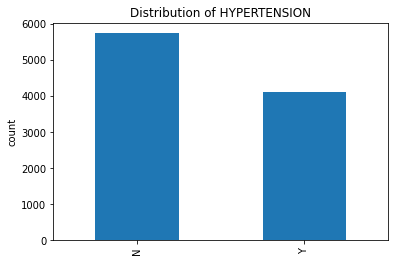

In [ ]:
print(df1["HYPERTENSION"].value_counts())

df1["HYPERTENSION"].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of HYPERTENSION')
plt.show()

N    2303
Y    1653
Name: HYPERTENSION, dtype: int64


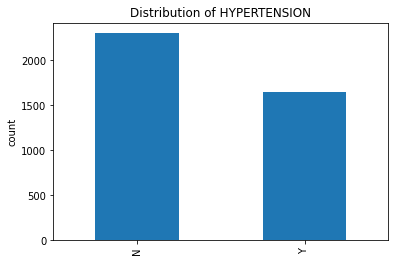

In [ ]:
print(df2["HYPERTENSION"].value_counts())

df2["HYPERTENSION"].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of HYPERTENSION')
plt.show()

# **1. df1데이터(결측치가 너무 많은 변수를 제거한 데이터)를 사용**
1. df1데이터: 결측치가 너무 많은 변수를 제거한 데이터
2. df2데이터: 결측치가 있는 행을 제거한 데이터

*   의사결정나무
*   랜덤 포레스트
*   그래디언트 부스팅
*   평가 & 모델선택
*   인사이트


## 의사결정나무 (Decision tree) 모델

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# df1: 9861행, 0-47열 / df2: 3956행, 0-51열
X = df1.iloc[:, :46]
y = df1['HYPERTENSION']

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
tree = DecisionTreeClassifier(max_depth = 4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.629
시험용 데이터 정확도: 0.605


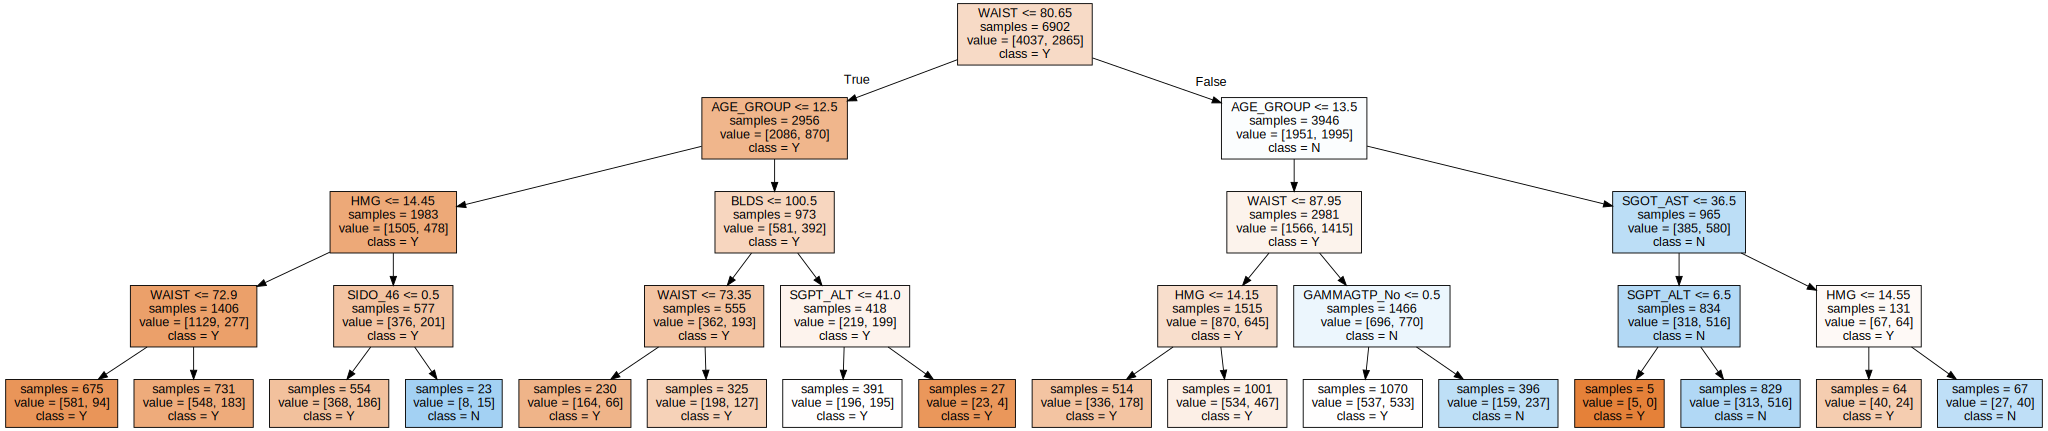

In [ ]:
# graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "Y", "N"],
                feature_names = df1.columns[:46], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

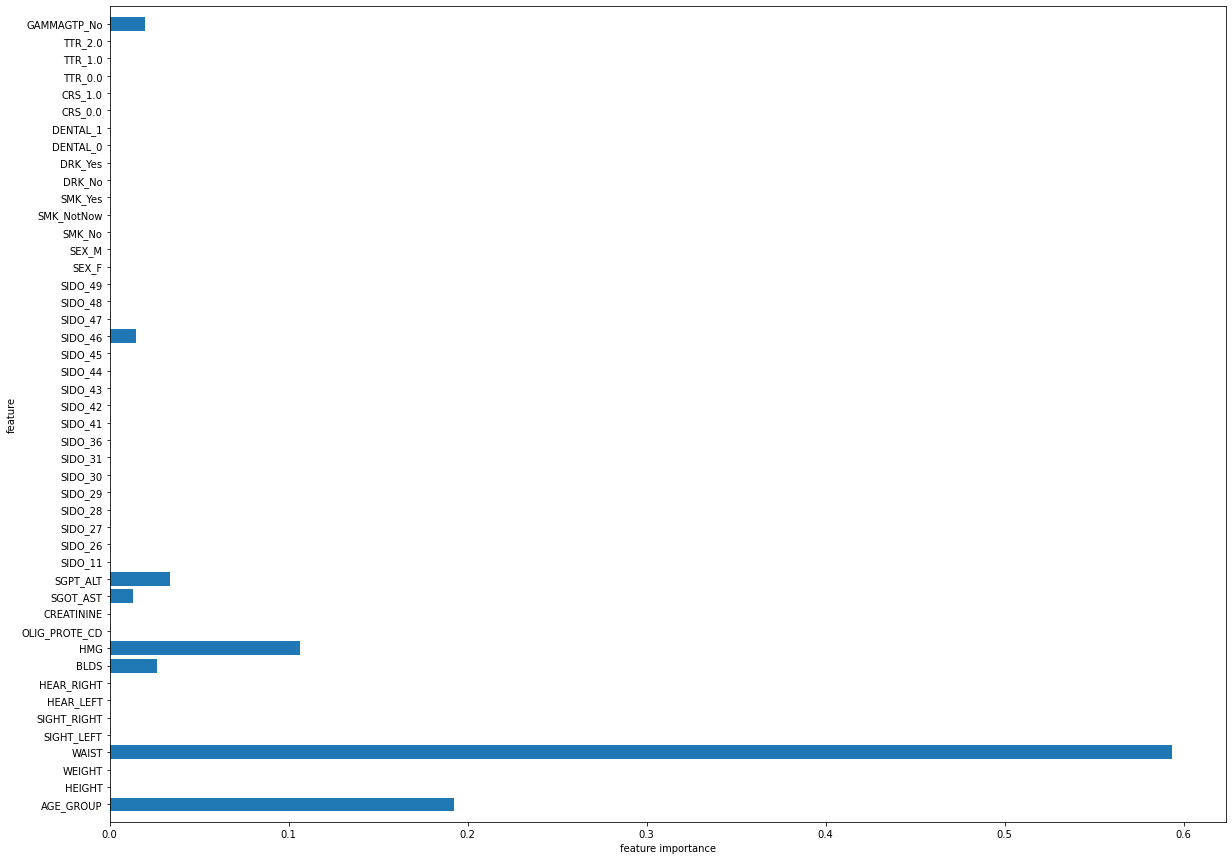

In [ ]:
## 주요 변수
import numpy as np

def plot_feature_importances_df1(model):
    plt.rcParams["figure.figsize"] = (20,15)
    n_features = len(df1.columns[:46])  
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df1.columns[:46])   
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) 
plot_feature_importances_df1(tree)

## 랜덤 포레스트 (Random forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_depth = 4, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.636
시험용 데이터 세트 정확도: 0.619


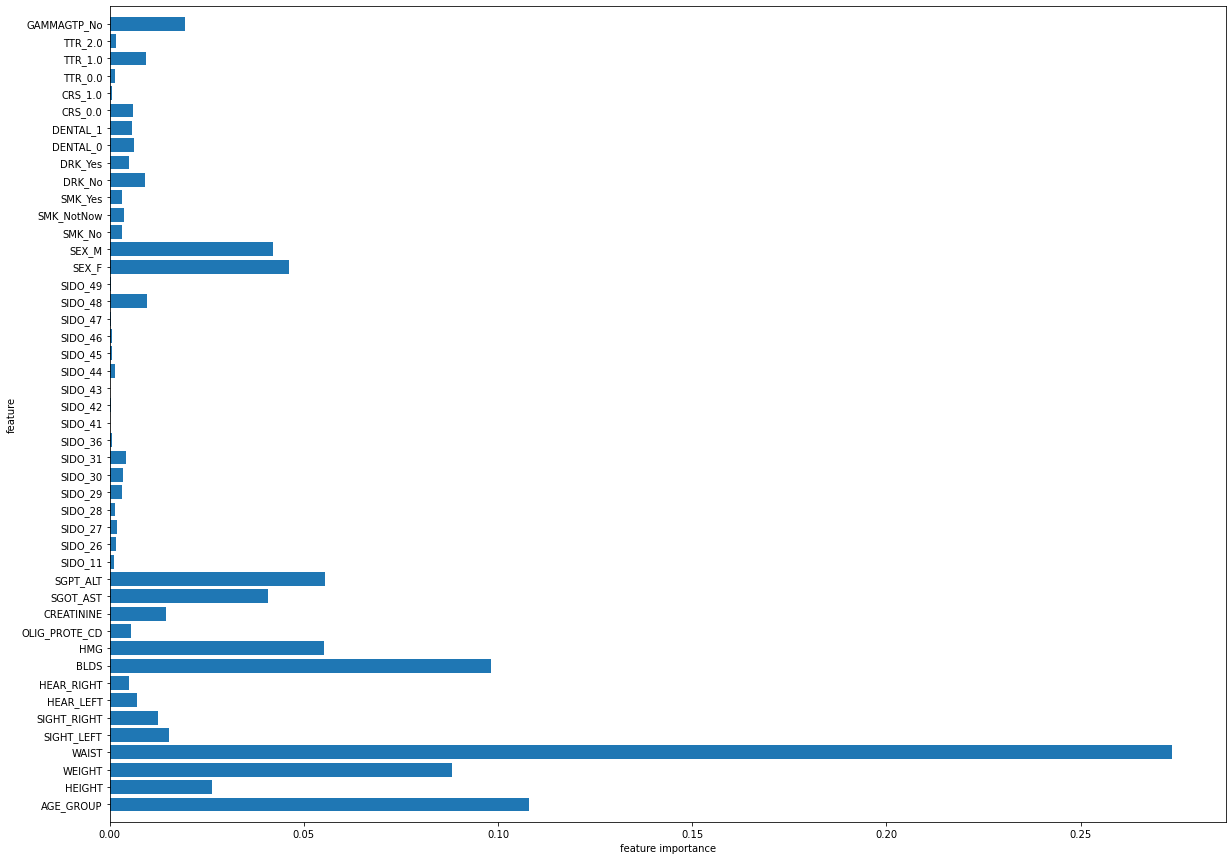

In [ ]:
plot_feature_importances_df1(forest)

## 그래디언트 부스팅 (Gradient Boosting)



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.689
시험용 데이터 세트 정확도: 0.623


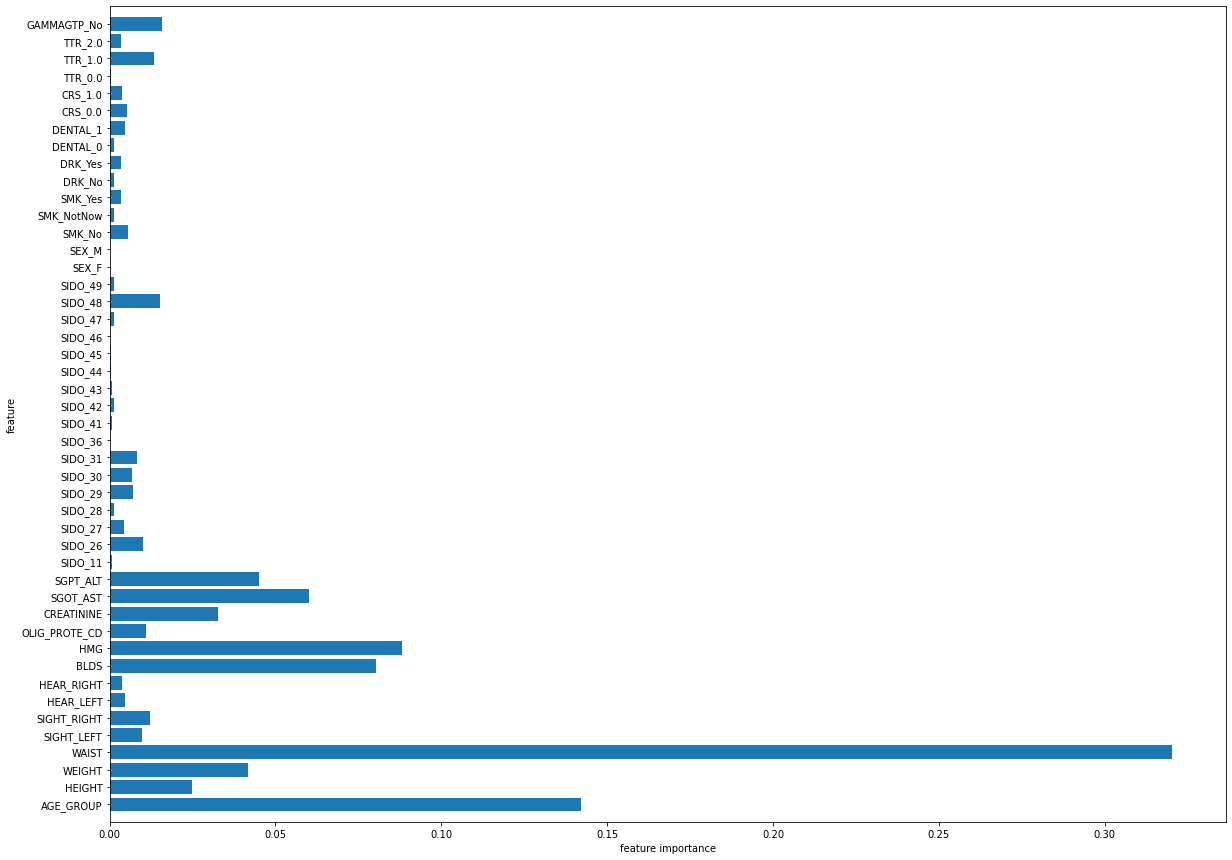

In [ ]:
plot_feature_importances_df1(gbrt)

## 교차 검증 (Cross validation)을 통한 모델 선택




In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=15)

print(kf)

dt_scores = cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=kf, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("--------------------------------------------------------------------")

print("Accuracy mean -- StratifiedKFold 이용")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

StratifiedKFold(n_splits=15, random_state=None, shuffle=False)
Accuracy
Decision tree:  [0.60737527 0.61171367 0.60434783 0.60217391 0.63478261 0.6326087
 0.58478261 0.62173913 0.59565217 0.56304348 0.65434783 0.63043478
 0.58913043 0.59347826 0.62391304]
Random forest:  [0.60086768 0.61171367 0.61956522 0.59782609 0.60434783 0.6173913
 0.63478261 0.60869565 0.64130435 0.57391304 0.6173913  0.6173913
 0.63695652 0.61304348 0.61304348]
Gradient boosting:  [0.61605206 0.63340564 0.63695652 0.57608696 0.61521739 0.64782609
 0.63043478 0.62608696 0.61304348 0.60869565 0.65434783 0.6326087
 0.65652174 0.62826087 0.63913043]
--------------------------------------------------------------------
Accuracy mean -- StratifiedKFold 이용
Decision tree :0.610
Random forest :0.614
Gradient boosting :0.628


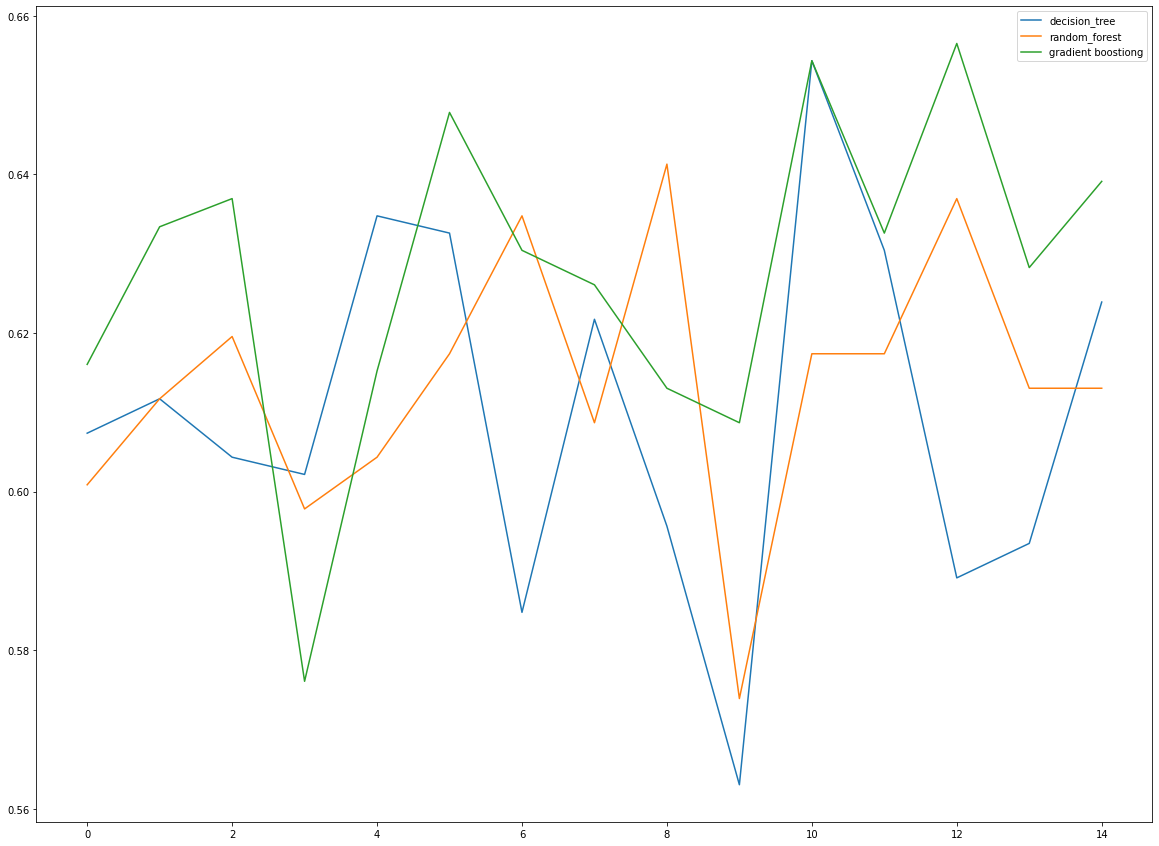

In [ ]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
            ['gradient boostiong',gbrt_scores]
          ]
cross_val_graph = pd.DataFrame.from_dict(dict(cv_list))
cross_val_graph.plot()

**교차검증을 통해 모델을 평가한 결과 그래디언트 부스팅이 가장 높은 정확도를 보였다**

## **모델 평가 지표(재현율)**
* 고혈압인 경우(Y)를 고혈압이 아닌 경우(N)로 판단하는 것을 줄이기 위해 재현율이 높은 모델을 선택하고자 한다.
 * 재현율(recall = sensitivity =  TP/(TP+FN))이 상대적으로 더 중요한 지표인 경우는 실제로 Positive인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우

In [ ]:
# tree = DecisionTreeClassifier(max_depth=4, random_state=0)
#forest = RandomForestClassifier(n_estimators=100, random_state=0)
# gbrt = GradientBoostingClassifier(random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

**정오 분류표 (Confusion matrix)**

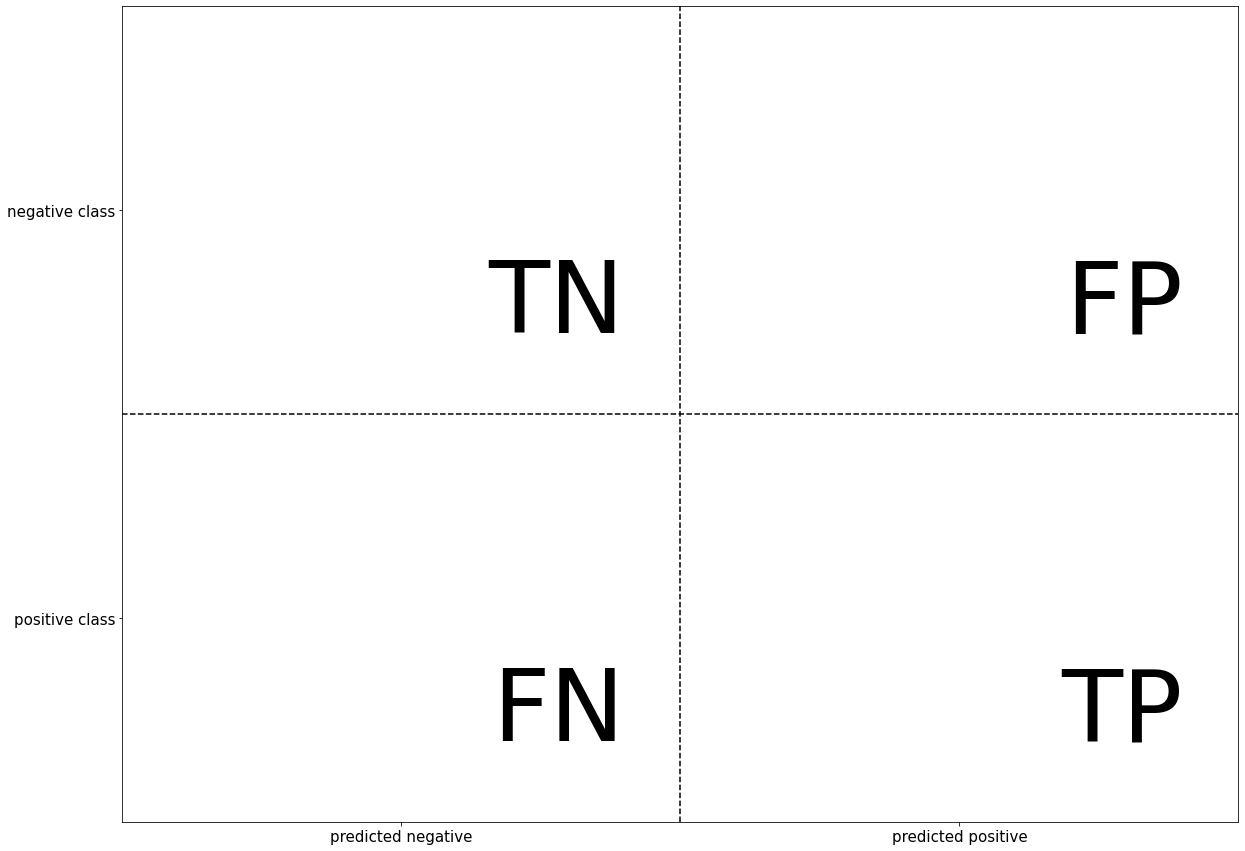

In [ ]:
mglearn.plots.plot_binary_confusion_matrix()

In [ ]:
print(y_test.value_counts())

tree_pred = tree.predict(X_test)
forest_pred = forest.predict(X_test)
gbrt_pred = gbrt.predict(X_test)

print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, tree_pred)))
print(confusion_matrix(y_test, tree_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, forest_pred)))
print(confusion_matrix(y_test, forest_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, gbrt_pred)))
print(confusion_matrix(y_test, gbrt_pred))

N    1708
Y    1251
Name: HYPERTENSION, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.605
[[1463  245]
 [ 924  327]]
Random forest 시험용 데이터 세트 정확도:0.619
[[1516  192]
 [ 935  316]]
Gradient boosting 시험용 데이터 세트 정확도:0.623
[[1305  403]
 [ 714  537]]


In [ ]:
from sklearn.metrics import classification_report

print("Decision Tree:")
print(classification_report(y_test, tree_pred, target_names=["N", "Y"]))
print("Random Forest:")
print(classification_report(y_test, forest_pred, target_names=["N", "Y"]))
print("Gradient Boosting:")
print(classification_report(y_test, gbrt_pred, target_names=["N", "Y"]))

Decision Tree:
              precision    recall  f1-score   support

           N       0.61      0.86      0.71      1708
           Y       0.57      0.26      0.36      1251

    accuracy                           0.60      2959
   macro avg       0.59      0.56      0.54      2959
weighted avg       0.60      0.60      0.56      2959

Random Forest:
              precision    recall  f1-score   support

           N       0.62      0.89      0.73      1708
           Y       0.62      0.25      0.36      1251

    accuracy                           0.62      2959
   macro avg       0.62      0.57      0.54      2959
weighted avg       0.62      0.62      0.57      2959

Gradient Boosting:
              precision    recall  f1-score   support

           N       0.65      0.76      0.70      1708
           Y       0.57      0.43      0.49      1251

    accuracy                           0.62      2959
   macro avg       0.61      0.60      0.60      2959
weighted avg       0.61  

In [ ]:
print('Decision tree 시험용 데이터 세트 재현율:{:.3f}'.format(recall_score(y_test, tree_pred, average='binary', pos_label="Y")))
print('Random forest 시험용 데이터 세트 재현율:{:.3f}'.format(recall_score(y_test, forest_pred, average='binary', pos_label="Y")))
print('Gradient boosting 시험용 데이터 세트 재현율:{:.3f}'.format(recall_score(y_test, gbrt_pred, average='binary', pos_label="Y")))

Decision tree 시험용 데이터 세트 재현율:0.261
Random forest 시험용 데이터 세트 재현율:0.253
Gradient boosting 시험용 데이터 세트 재현율:0.429


## **최종 모델 선택**
### -**교차검증 결과:** 그래디언트 부스팅이 가장 높은 정확도를 보였다
### -**모델 평가 지표 중 재현율을 본 결과:** 그래디언트 부스팅의 재현율이 가장 높았다.
### 주의점
* 예측이 목적일 경우, 현재 그래디언트 부스팅 모델은 재현율이 50%를 넘지 못하기 때문에 재현율을 높일 수 있도록 변수를 추가하거나, 데이터를 더 많이 수집해야 등의 추가적인 작업이 필요하다.

## **=> 그래디언트 부스팅을 선택한다.**


## **인사이트 by 그래디언트 부스팅(feat.의사결정나무)**


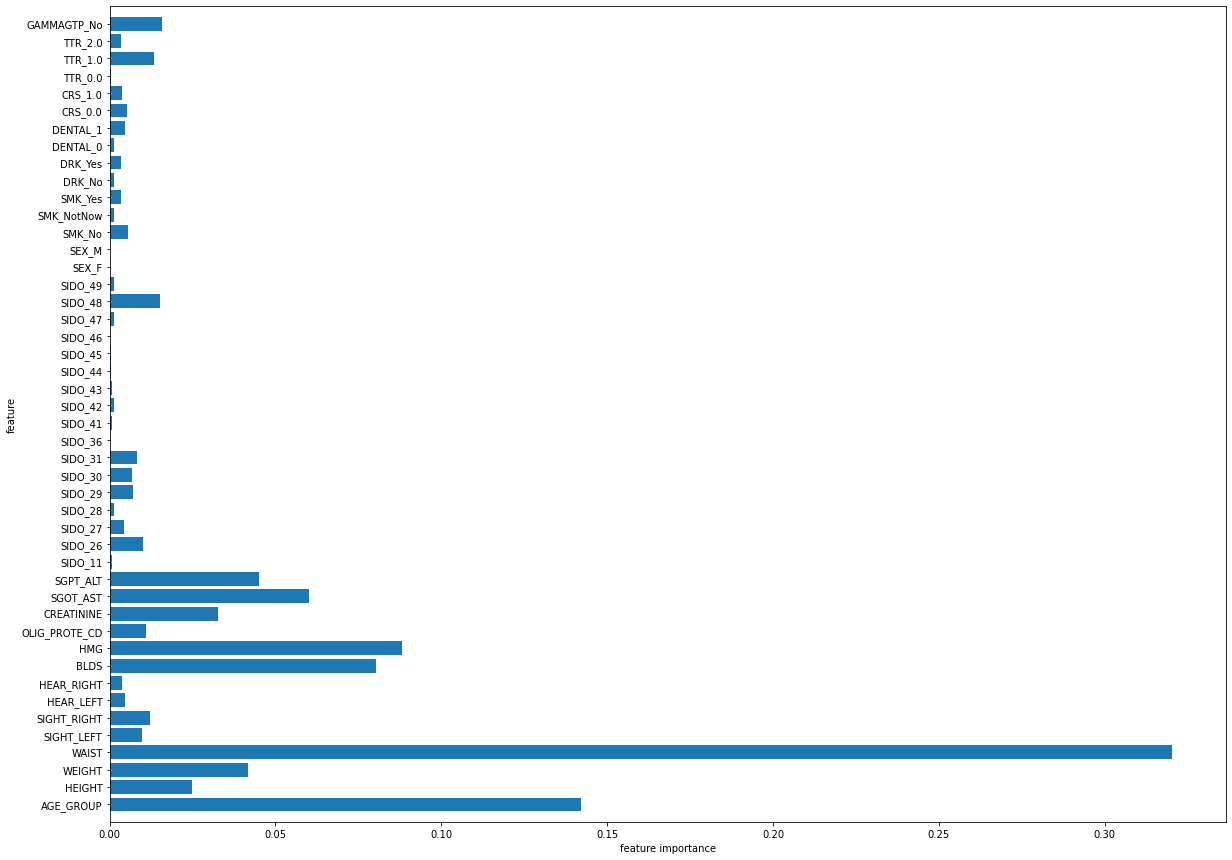

In [ ]:
# 그래디언트부스팅을 통해 본 주요 변수
plot_feature_importances_df1(gbrt)

In [ ]:
result_gbrt = gbrt.feature_importances_

In [ ]:
result_gbrt_df = pd.DataFrame(result_gbrt)
result_gbrt_df["name"] = df1.columns[:46]
display(result_gbrt_df.info())

display(result_gbrt_df.sort_values(by= 0, ascending = False))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       46 non-null     float64
 1   name    46 non-null     object 
dtypes: float64(1), object(1)
memory usage: 864.0+ bytes


None

,0,name
3,0.320420,WAIST
0,0.142027,AGE_GROUP
9,0.088059,HMG
8,0.080345,BLDS
12,0.060184,SGOT_AST
13,0.044905,SGPT_ALT
2,0.041605,WEIGHT
11,0.032749,CREATININE
1,0.024964,HEIGHT
45,0.015838,GAMMAGTP_No


주요변수를 보면,

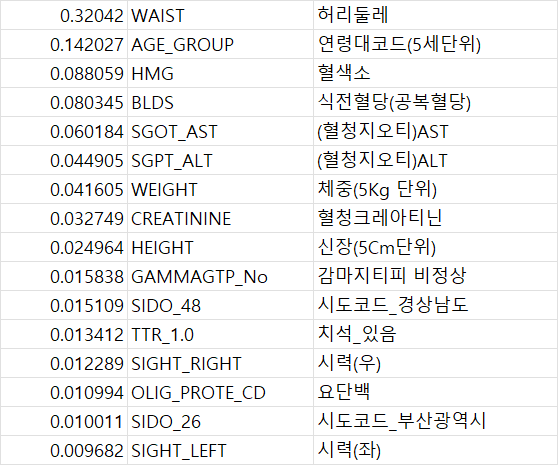


#### **주요 변수를 중심으로 df1 탐색하여 인사이트 도출**

In [ ]:
## WAIST(허리둘레)
# 고혈압 여부별 평균 허리둘레
waist_mean = df1.groupby('HYPERTENSION').agg(mean_w = ('WAIST', 'mean'))
waist_mean

,mean_w
HYPERTENSION,
N,80.488251
Y,84.943878


**고혈압인 경우가 아닌 경우보다 허리둘레가 큰 것을 볼 수 있다.**

In [ ]:
## AGE_GROUP(연령대코드(5세단위))에 따른 고혈압 여부
age_count = df1.groupby('AGE_GROUP').agg(count_h = ('HYPERTENSION', 'value_counts'))
pd.DataFrame(age_count)

count_h
AGE_GROUP HYPERTENSION         
9         N                1057
          Y                 485
10        N                 880
          Y                 483
11        N                1109
          Y                 685
12        N                 877
          Y                 620
13        N                 844
          Y                 682
14        Y                 429
          N                 411
15        Y                 367
          N                 299
16        Y                 203
          N                 147
17        Y                 137
          N                 101
18        Y                  25
          N                  20

**일반적으로 나이가 많아질수록, 고혈압의 비율이 높아지는 것을 확인할 수 있다.**

In [ ]:
# 고혈압 여부에 따른 혈색소 수치의 평균, 최소값

hmg_mean = df1.groupby('HYPERTENSION').agg(mean_h = ('HMG', 'mean'), min_h = ('HMG', 'min'))
hmg_mean

,mean_h,min_h
HYPERTENSION,,
N,14.050479,5.1
Y,14.453207,8.1


*   **고혈압 여부에 따라 혈색소 수치가 크게 차이나지는 않지만 고혈압인 경우가 아닌 경우보다 높은 혈색소 수치를 보인다.**
*   혈색소:적혈구의 주요 성분으로 산소와 이산화탄소를 운반하는 역할을 수행, 혈액이나 혈구 속에 존재하는 색소단백으로 글로빈(globin)과 엠(heme)으로 구성되며 혈중의 산소운반체로서의 역할 수행
*   혈색소 수치를 통해 산소운반이 제대로 이루어지고 있는지 확인할 수 있다.
*   성별에 따라 정상수치에 약간의 차이가 있다.


In [ ]:
# 고혈압 여부에 따른 식전혈당 수치의 평균

blds_mean = df1.groupby('HYPERTENSION').agg(mean_w = ('BLDS', 'mean'))
blds_mean

,mean_w
HYPERTENSION,
N,101.370583
Y,107.177114


*   **고혈압인 경우가 아닌 경우보다 높은 식전혈당 수치를 보인다.**



In [ ]:
## SGPT_AST((혈청지오티)AST)의 평균, 최대
ast_mean = df1.groupby('HYPERTENSION').agg(mean_a = ('SGOT_AST', 'mean'), max_w = ('SGOT_AST', 'max'))
ast_mean

,mean_a,max_w
HYPERTENSION,,
N,26.661619,484.0
Y,28.907191,692.0




*   **고혈압인 경우에 아닌 경우보다 (혈청지오티)AST의 평균이 높으나 둘다 정상수치에 해당한다.**
*   **하지만 (혈청지오티)AST의 최대값을 고혈압 여부에 따라 볼 경우 고혈압인 경우의 최대값이 훨씬 높게 나온다.**
*   (혈청지오티)AST: 간 기능을 나타내는 혈액검사상의 수치, 간세포 이외에 심장, 신장, 뇌 , 근육 등에도 존재하는 효소로 이러한 세포들이 손상을 받는 경우 농도가 증가함
* 정상치 0~40IU/L


In [ ]:
# 참고해보는 의사결정나무로 본 주요변수
result_tree = tree.feature_importances_

In [ ]:
result_tree_df = pd.DataFrame(result_tree)
result_tree_df["name"] = df1.columns[:46]
display(result_tree_df.info())

display(result_tree_df.sort_values(by= 0, ascending = False))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       46 non-null     float64
 1   name    46 non-null     object 
dtypes: float64(1), object(1)
memory usage: 864.0+ bytes


None

,0,name
3,0.593693,WAIST
0,0.192583,AGE_GROUP
9,0.106516,HMG
13,0.033709,SGPT_ALT
8,0.026316,BLDS
45,0.019509,GAMMAGTP_No
27,0.014820,SIDO_46
12,0.012854,SGOT_AST
6,0.000000,HEAR_LEFT
36,0.000000,DRK_No


주요변수를 보면,

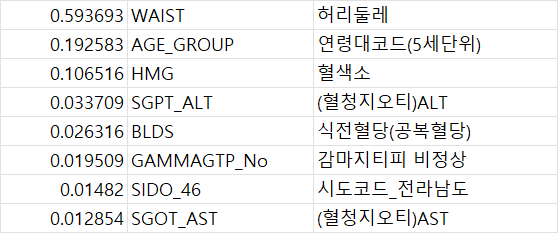

# **2. df2데이터(결측치가 있는 행을 제거한 데이터)를 사용**
1. df1데이터: 결측치가 너무 많은 변수를 제거한 데이터
2. df2데이터: 결측치가 있는 행을 제거한 데이터, df1에 비해 데이터 양이 적음

*   의사결정나무
*   랜덤 포레스트
*   그래디언트 부스팅
*   평가 & 모델선택
*   인사이트

## 의사결정나무 (Decision tree) 모델

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# df1: 9861행, 0-47열 / df2: 3956행, 0-51열
X = df2.iloc[:, :50]
y = df2['HYPERTENSION']

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
tree = DecisionTreeClassifier(max_depth = 4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.635
시험용 데이터 정확도: 0.610


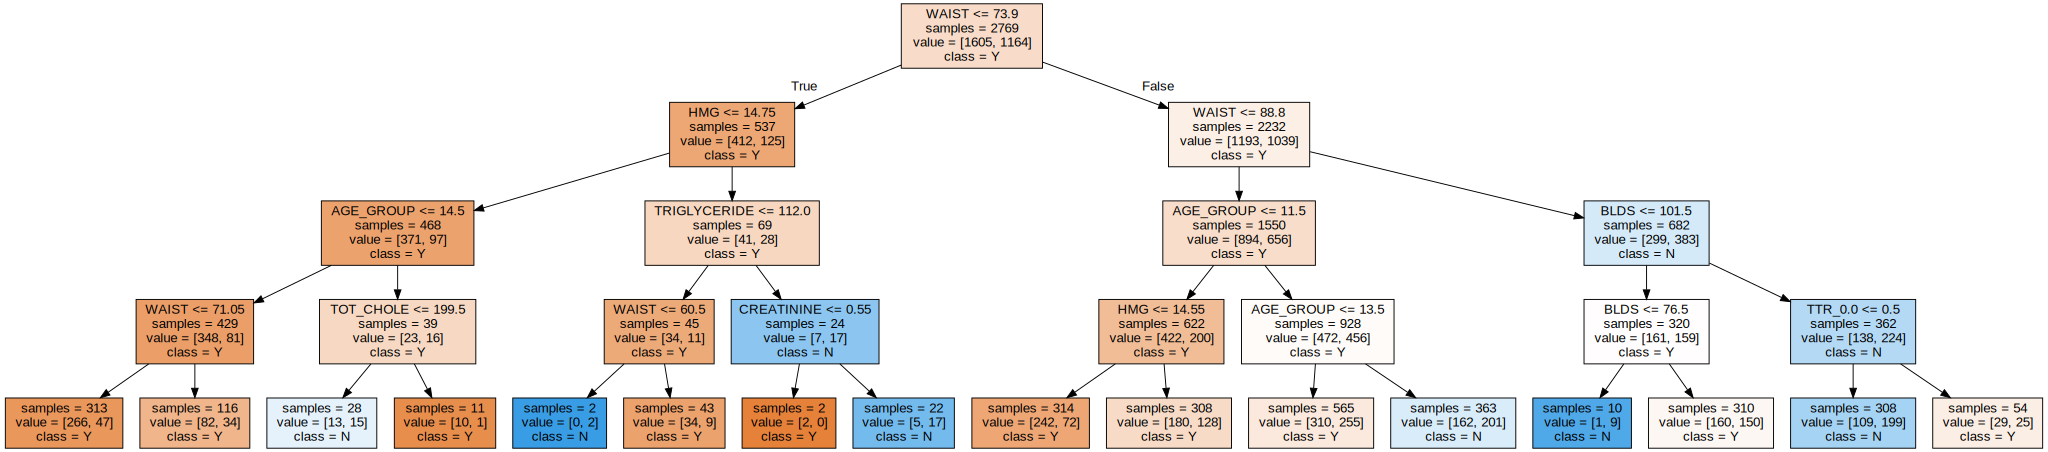

In [ ]:
# graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "Y", "N"],
                feature_names = df2.columns[:50], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

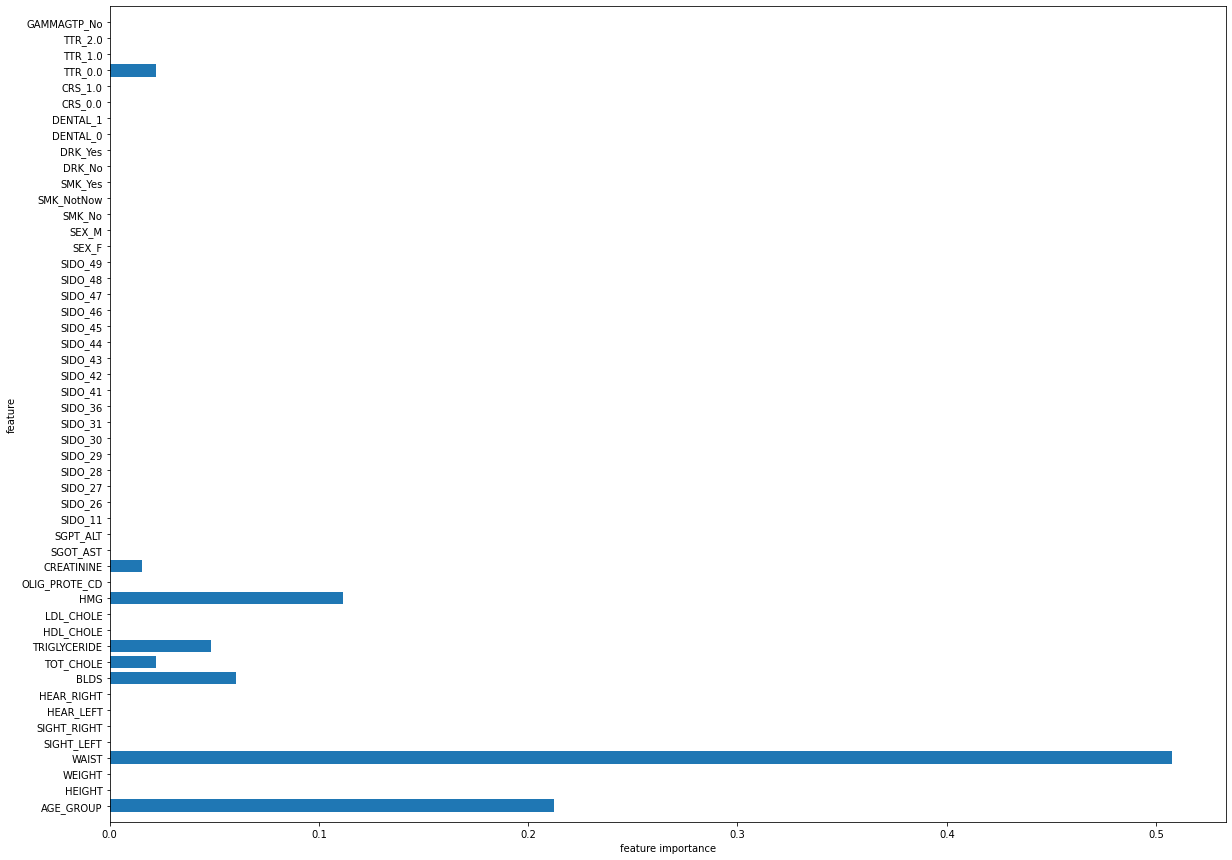

In [ ]:
## 주요 변수
import numpy as np

def plot_feature_importances_df2(model):
    plt.rcParams["figure.figsize"] = (20,15)
    n_features = len(df2.columns[:50])  
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df2.columns[:50])   
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) 
plot_feature_importances_df2(tree)

## 랜덤 포레스트 (Random forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_depth = 4, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.655
시험용 데이터 세트 정확도: 0.623


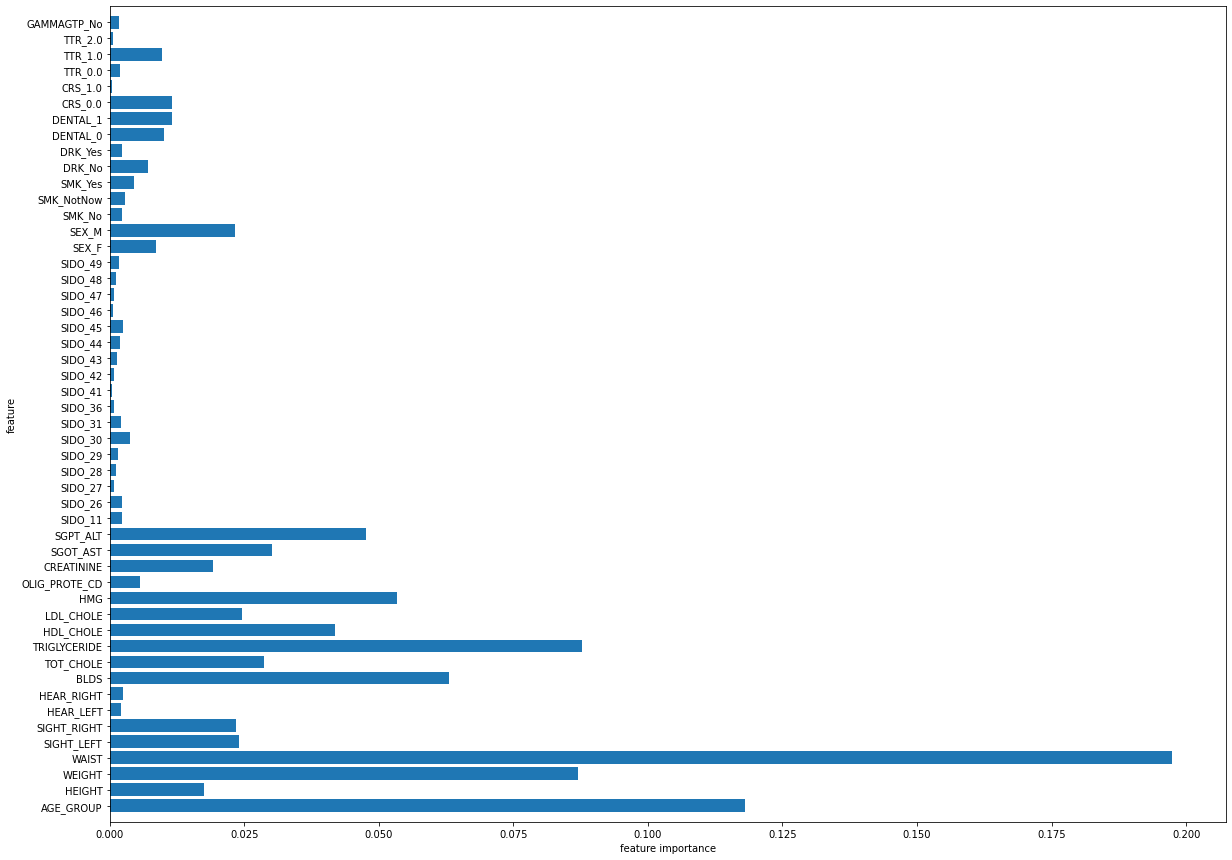

In [ ]:
plot_feature_importances_df2(forest)

## 그래디언트 부스팅 (Gradient Boosting)



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.744
시험용 데이터 세트 정확도: 0.629


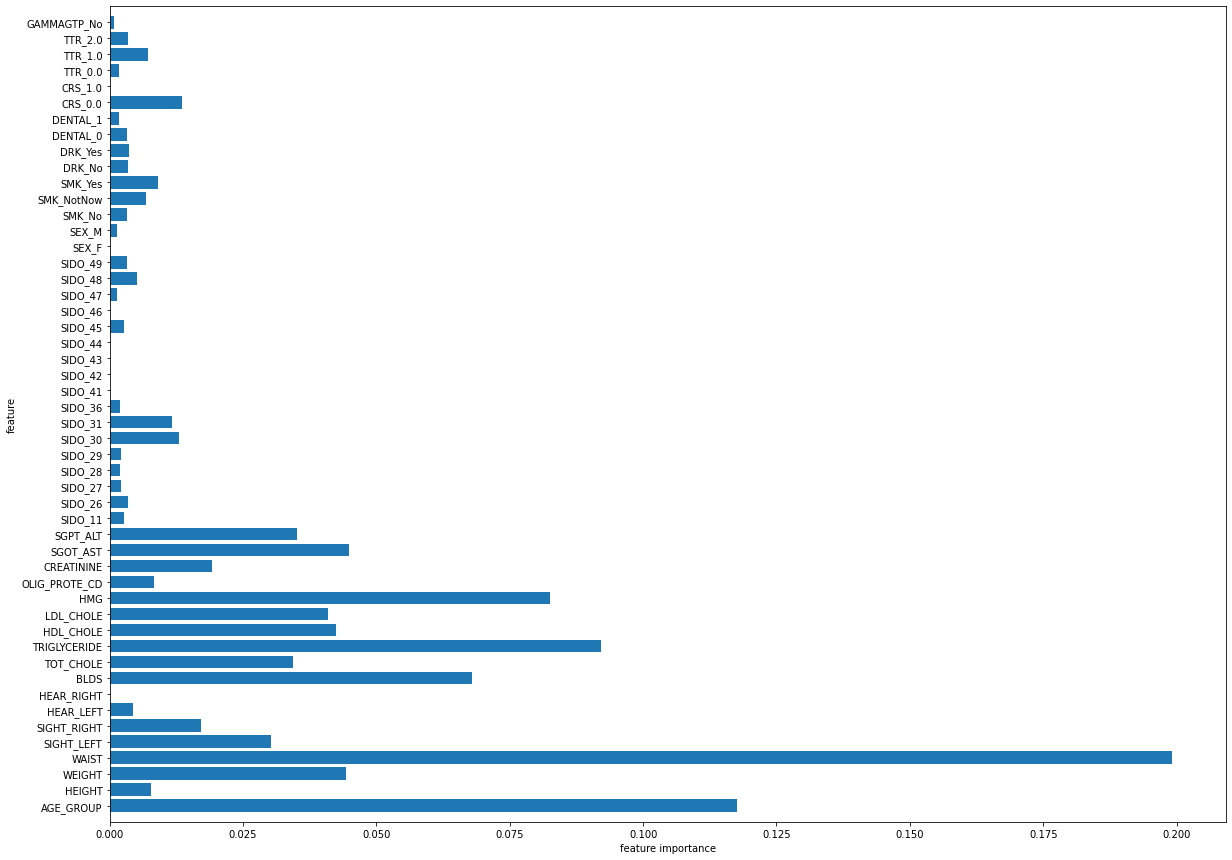

In [ ]:
plot_feature_importances_df2(gbrt)

## 교차 검증 (Cross validation)을 통한 모델 선택




In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=15)

print(kf)

dt_scores = cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=kf, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("--------------------------------------------------------------------")

print("Accuracy mean -- StratifiedKFold 이용")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

StratifiedKFold(n_splits=15, random_state=None, shuffle=False)
Accuracy
Decision tree:  [0.6        0.57297297 0.57837838 0.56216216 0.59459459 0.57297297
 0.55675676 0.58378378 0.53513514 0.59782609 0.58695652 0.60326087
 0.66847826 0.54347826 0.61956522]
Random forest:  [0.61081081 0.62702703 0.59459459 0.61081081 0.62702703 0.57837838
 0.64324324 0.59459459 0.61081081 0.60869565 0.5923913  0.58152174
 0.61413043 0.61413043 0.5923913 ]
Gradient boosting:  [0.62702703 0.6        0.58378378 0.61621622 0.62702703 0.60540541
 0.63783784 0.60540541 0.57297297 0.625      0.61956522 0.57608696
 0.70652174 0.625      0.63043478]
--------------------------------------------------------------------
Accuracy mean -- StratifiedKFold 이용
Decision tree :0.585
Random forest :0.607
Gradient boosting :0.617


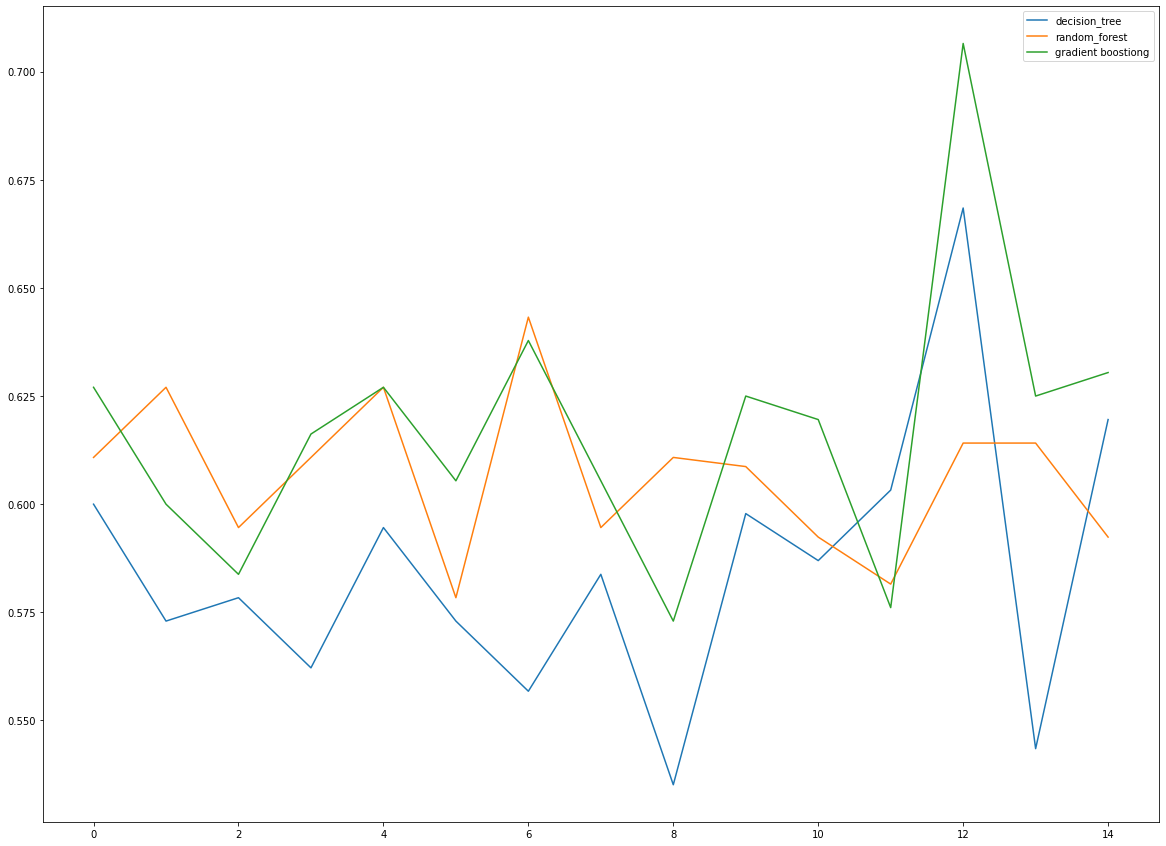

In [ ]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
            ['gradient boostiong',gbrt_scores]
          ]
cross_val_graph = pd.DataFrame.from_dict(dict(cv_list))
cross_val_graph.plot()

**교차검증을 통해 모델을 평가한 결과 그래디언트 부스팅이 가장 높은 정확도를 보였다**

## **모델 평가 지표(재현율)**
* 고혈압인 경우(Y)를 고혈압이 아닌 경우(N)로 판단하는 것을 줄이기 위해 재현율이 높은 모델을 선택하고자 한다.
 * 재현율(recall = sensitivity =  TP/(TP+FN))이 상대적으로 더 중요한 지표인 경우는 실제로 Positive인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

**정오 분류표 (Confusion matrix)**

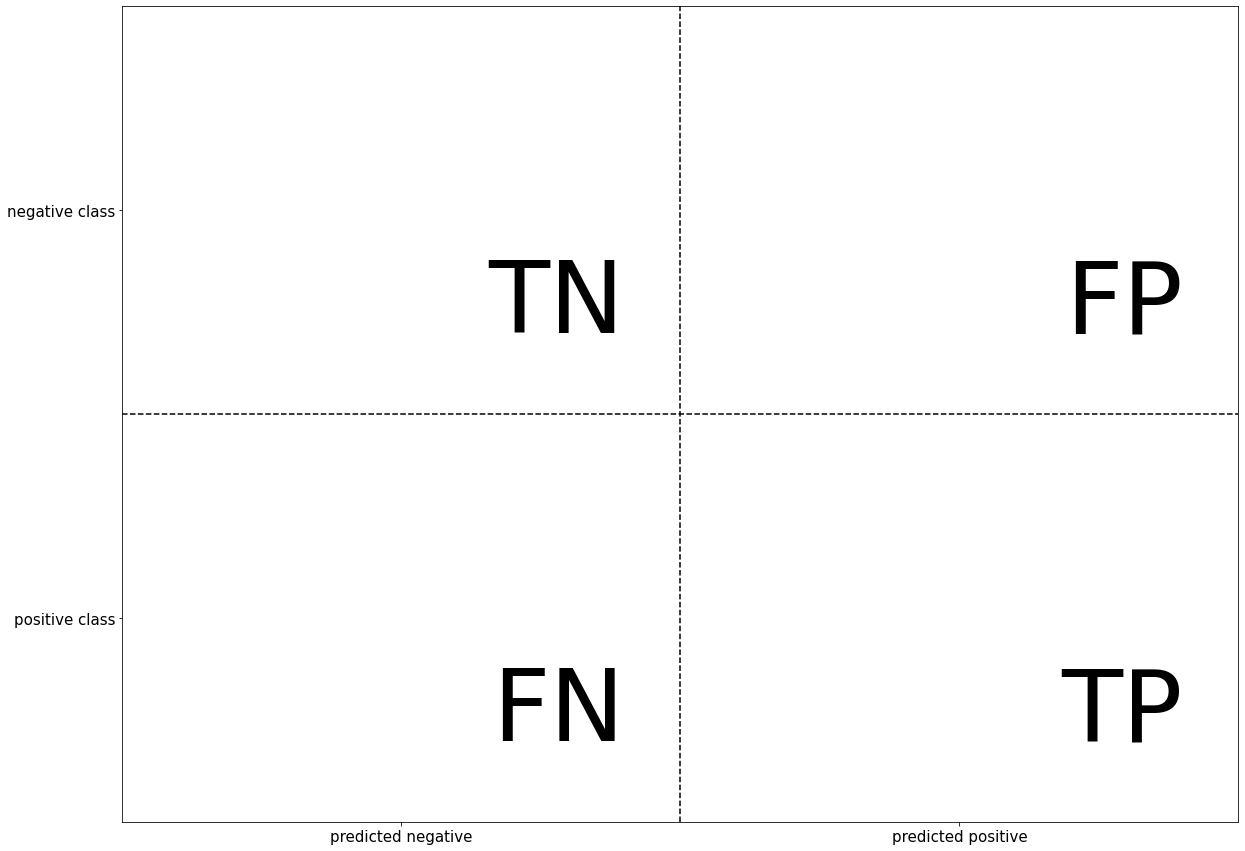

In [ ]:
mglearn.plots.plot_binary_confusion_matrix()


In [ ]:
print(y_test.value_counts())

tree_pred = tree.predict(X_test)
forest_pred = forest.predict(X_test)
gbrt_pred = gbrt.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, tree_pred)))
print(confusion_matrix(y_test, tree_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, forest_pred)))
print(confusion_matrix(y_test, forest_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, gbrt_pred)))
print(confusion_matrix(y_test, gbrt_pred))

N    698
Y    489
Name: HYPERTENSION, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.610
[[562 136]
 [327 162]]
Random forest 시험용 데이터 세트 정확도:0.623
[[626  72]
 [375 114]]
Gradient boosting 시험용 데이터 세트 정확도:0.629
[[531 167]
 [273 216]]


In [ ]:
from sklearn.metrics import classification_report

# 각 클래스가 Positive일 때의 정밀도, 재현율, f1 값을 보여줌 ("M"이 Postivit인 경우가 기본값임)
# macro avg는 클래스별 점수의 평균을 계산
# weighted avg는 클래스의 샘플 수로 가중평균을 계산
print("Decision Tree:")
print(classification_report(y_test, tree_pred, target_names=["N", "Y"]))
print("Random Forest:")
print(classification_report(y_test, forest_pred, target_names=["N", "Y"]))
print("Gradient Boosting:")
print(classification_report(y_test, gbrt_pred, target_names=["N", "Y"]))

Decision Tree:
              precision    recall  f1-score   support

           N       0.63      0.81      0.71       698
           Y       0.54      0.33      0.41       489

    accuracy                           0.61      1187
   macro avg       0.59      0.57      0.56      1187
weighted avg       0.60      0.61      0.59      1187

Random Forest:
              precision    recall  f1-score   support

           N       0.63      0.90      0.74       698
           Y       0.61      0.23      0.34       489

    accuracy                           0.62      1187
   macro avg       0.62      0.56      0.54      1187
weighted avg       0.62      0.62      0.57      1187

Gradient Boosting:
              precision    recall  f1-score   support

           N       0.66      0.76      0.71       698
           Y       0.56      0.44      0.50       489

    accuracy                           0.63      1187
   macro avg       0.61      0.60      0.60      1187
weighted avg       0.62  

In [ ]:
print('Decision tree 시험용 데이터 세트 재현율:{:.3f}'.format(recall_score(y_test, tree_pred, average='binary', pos_label="Y")))
print('Random forest 시험용 데이터 세트 재현율:{:.3f}'.format(recall_score(y_test, forest_pred, average='binary', pos_label="Y")))
print('Gradient boosting 시험용 데이터 세트 재현율:{:.3f}'.format(recall_score(y_test, gbrt_pred, average='binary', pos_label="Y")))

Decision tree 시험용 데이터 세트 재현율:0.331
Random forest 시험용 데이터 세트 재현율:0.233
Gradient boosting 시험용 데이터 세트 재현율:0.442


## **최종 모델 선택**
### -**교차검증 결과:** 그래디언트 부스팅이 가장 높은 정확도를 보였다
### -**모델 평가 지표 중 재현율을 본 결과:** 그래디언트 부스팅의 재현율이 가장 높았다.
### 주의점
* 예측이 목적일 경우, 현재 그래디언트 부스팅 모델은 재현율이 50%를 넘지 못하기 때문에 재현율을 높일 수 있도록 변수를 추가하거나, 데이터를 더 많이 수집해야 등의 추가적인 작업이 필요하다.

## **=> 그래디언트 부스팅을 선택한다.**


## **인사이트 by 그래디언트 부스팅(feat.의사결정나무)**

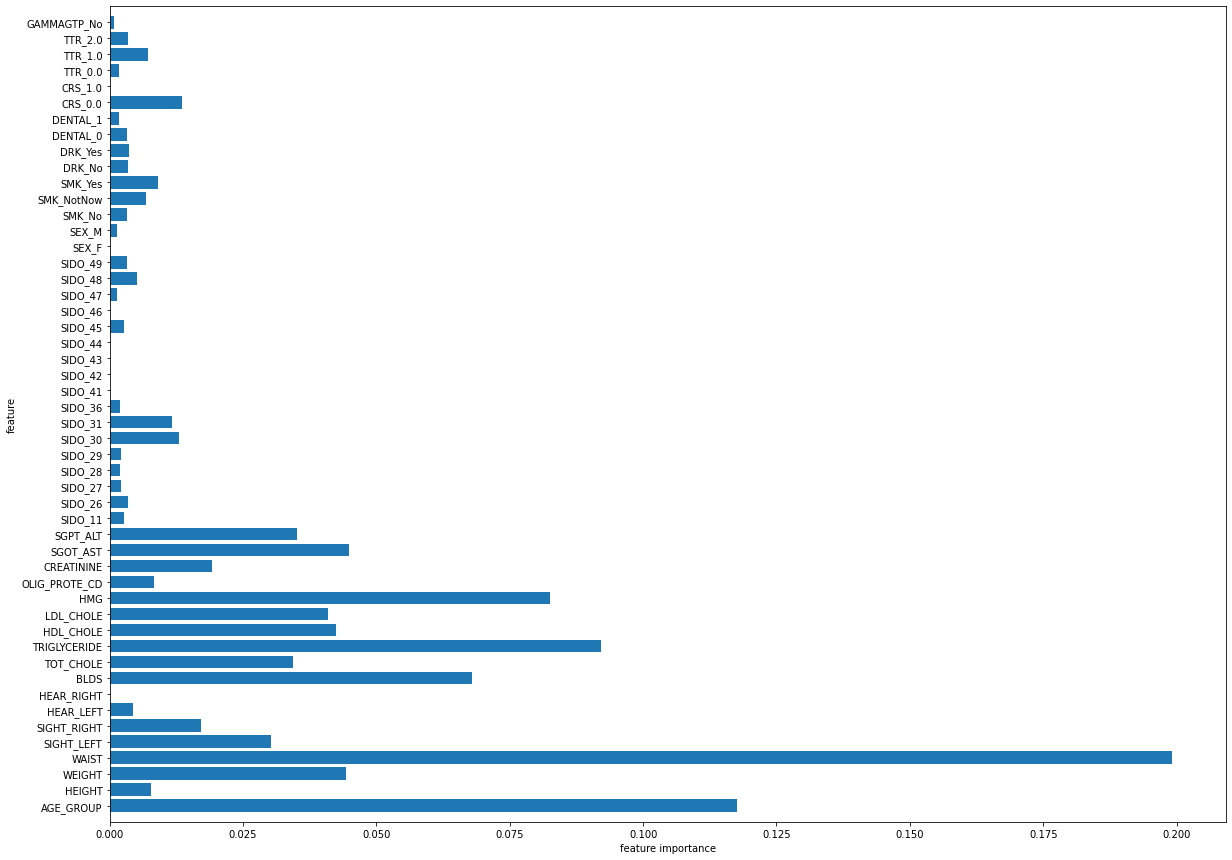

In [ ]:
# 그래디언트부스팅을 통해 본 주요 변수
plot_feature_importances_df2(gbrt)

In [ ]:
result_gbrt = gbrt.feature_importances_

In [ ]:
result_gbrt_df = pd.DataFrame(result_gbrt)
result_gbrt_df["name"] = df2.columns[:50]
display(result_gbrt_df.info())

display(result_gbrt_df.sort_values(by= 0, ascending = False))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       50 non-null     float64
 1   name    50 non-null     object 
dtypes: float64(1), object(1)
memory usage: 928.0+ bytes


None

,0,name
3,0.199209,WAIST
0,0.117509,AGE_GROUP
10,0.092047,TRIGLYCERIDE
13,0.082538,HMG
8,0.067980,BLDS
16,0.044948,SGOT_AST
2,0.044400,WEIGHT
11,0.042531,HDL_CHOLE
12,0.041004,LDL_CHOLE
17,0.035051,SGPT_ALT


주요변수를 보면,

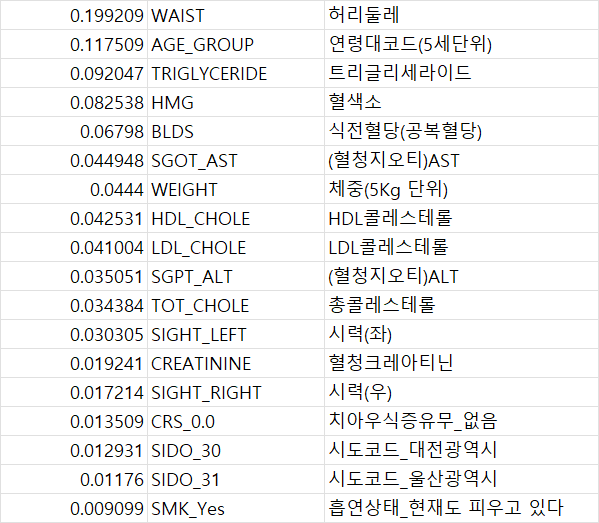

#### 주요 변수를 중심으로 df1 탐색하여 인사이트 도출

In [ ]:
## WAIST(허리둘레)
# 고혈압 여부별 평균 허리둘레
waist_mean = df2.groupby('HYPERTENSION').agg(mean_w = ('WAIST', 'mean'))
waist_mean

,mean_w
HYPERTENSION,
N,80.43274
Y,84.70127


**고혈압인 경우가 아닌 경우보다 허리둘레가 큰 것을 볼 수 있다.**

In [ ]:
## AGE_GROUP(연령대코드(5세단위))에 따른 고혈압 여부
age_count = df2.groupby('AGE_GROUP').agg(count_h = ('HYPERTENSION', 'value_counts'))
pd.DataFrame(age_count)

count_h
AGE_GROUP HYPERTENSION         
9         N                 566
          Y                 254
10        N                 283
          Y                 148
11        N                 295
          Y                 194
12        N                 269
          Y                 194
13        N                 497
          Y                 389
14        Y                 166
          N                 150
15        Y                 121
          N                 107
16        Y                  96
          N                  64
17        Y                  83
          N                  67
18        Y                   8
          N                   5

**일반적으로 나이가 많아질수록, 고혈압의 비율이 높아지는 것을 확인할 수 있다.**
- df1의 경우보다 비율이 차이가 크게 나는 것으로 보인다.(df1은 연령대코드별 고혈압의 비율이 60%가 넘는 경우가 없었지만 df2에서는 몇 연령대 코드에서 코혈압의 비율이 60%가 넘는다.)

In [ ]:
# 고혈압 여부에 따른 트리클리세라이드 수치의 평균, 최대, 최소

tig_decribe = df2.groupby('HYPERTENSION').agg(mean_t= ('TRIGLYCERIDE', 'mean'), max_t= ('TRIGLYCERIDE', 'max'), min_t= ('TRIGLYCERIDE', 'min'))
tig_decribe

,mean_t,max_t,min_t
HYPERTENSION,,,
N,117.881459,399.0,14.0
Y,136.035088,399.0,20.0


*   **고혈압인 경우가 아닌 경우보다 높은 트리글리세라이드 수치를 보인다.**
* 트리클리세라이드
  * 단순지질 혹은 중성지질을 뜻함
  *글리세롤에 3분자 지방산이 에스테르 합한 것으로서 자연계에서 찾아낼 수 있는 지방유도체 가운데 가장 분포가 넓음
  * 정상치는 30~135mg/dL
  * 몸에 필요한 에너지보다 많은 양의 음식을 섭취할 경우(특히 탄수화물) 트리글리세라이드 수치가 높아진다.


In [ ]:
# 고혈압 여부에 따른 혈색소 수치의 평균
hmg_mean = df2.groupby('HYPERTENSION').agg(mean_w = ('HMG', 'mean'))
hmg_mean

,mean_w
HYPERTENSION,
N,13.986279
Y,14.365578


*   **고혈압 여부에 따라 혈색소 수치가 크게 차이나지는 않지만 고혈압인 경우가 아닌 경우보다 높은 혈색소 수치를 보인다.**
*   혈색소:적혈구의 주요 성분으로 산소와 이산화탄소를 운반하는 역할을 수행, 혈액이나 혈구 속에 존재하는 색소단백으로 글로빈(globin)과 엠(heme)으로 구성되며 혈중의 산소운반체로서의 역할 수행
*   혈색소 수치를 통해 산소운반이 제대로 이루어지고 있는지 확인할 수 있다.
*   성별에 따라 정상수치에 약간의 차이가 있다.


In [ ]:
# 고혈압 여부에 따른 식전혈당 수치의 평균

blds_mean = df2.groupby('HYPERTENSION').agg(mean_b = ('BLDS', 'mean'))
blds_mean

,mean_b
HYPERTENSION,
N,101.459401
Y,106.494858


*   **고혈압인 경우가 아닌 경우보다 높은 식전혈당 수치를 보인다.**



In [ ]:
## SGPT_AST((혈청지오티)AST)의 평균, 최대
ast_mean = df2.groupby('HYPERTENSION').agg(mean_a = ('SGOT_AST', 'mean'), max_w = ('SGOT_AST', 'max'))
ast_mean


,mean_a,max_w
HYPERTENSION,,
N,26.989579,484.0
Y,28.535995,265.0




*   **고혈압인 경우에 아닌 경우보다 (혈청지오티)AST의 평균이 높으나 둘다 정상수치에 해당한다.**
*   **최댓값의 경우는 이상치가 포함되어 있는 것 같아서 설명에서 제외한다.**
*   (혈청지오티)AST: 간 기능을 나타내는 혈액검사상의 수치, 간세포 이외에 심장, 신장, 뇌 , 근육 등에도 존재하는 효소로 이러한 세포들이 손상을 받는 경우 농도가 증가함
* 정상치 0~40IU/L


In [ ]:
# 참고해보는 의사결정나무로 본 주요변수
result_tree = tree.feature_importances_

In [ ]:
result_tree_df = pd.DataFrame(result_tree)
result_tree_df["name"] = df2.columns[:50]
display(result_tree_df.info())

display(result_tree_df.sort_values(by= 0, ascending = False))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       50 non-null     float64
 1   name    50 non-null     object 
dtypes: float64(1), object(1)
memory usage: 928.0+ bytes


None

,0,name
3,0.507803,WAIST
0,0.212260,AGE_GROUP
13,0.111290,HMG
8,0.060215,BLDS
10,0.048269,TRIGLYCERIDE
9,0.022392,TOT_CHOLE
46,0.022084,TTR_0.0
15,0.015688,CREATININE
31,0.000000,SIDO_46
32,0.000000,SIDO_47


주요변수를 보면,

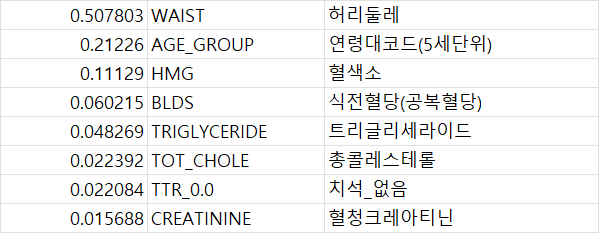

# **3. 인사이트 최종 정리**
## **1) df1, df2 각각을 사용했을 때의 그래디언트부스팅모델 결과 비교**

*   시험용 데이터 세트의 정확도와 재현율이 df1보다 df2f를 사용했을 때 조금 더 높게 나왔다. (아래의 평가지표 참고)
*   => 이 데이터에서는 관련된 다양한 변수 데이터가 있는 것이 모델의 성능을 높이는데 도움이 된다고 볼 수 있다.

## **2) df1, df2 각각을 사용했을 때의 주요 변수의 변화**


*   조금 더 많은 변수를 포함한 df2의 그래디언부스팅모델의 주요변수를 살펴보면 df1에서 제거된 4가지 변수가 포함되었음을 확인할 수 있다
* 총콜레스테롤, 트리글리세라이드, HDL콜레스테롤, LOL콜레스테롤

## **3) 두개의 데이터를 고려하였을 때 주요변수 TOP6**


*  WAIST (허리둘레)
*  AGE_GROUP (연령대코드(5세단위))
*  TRIGLYCERIDE (트리글리세라이드)
*  HMG (혈색소)
*  BLDS(식전혈당(공복혈당))
*  SGOT_AST ((혈청지오티)AST)





### 평가지표 비교
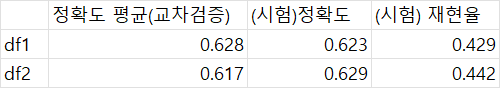

## **4) 주요변수를 통해 알아보는 고혈압 예방 생활습관**
* **WAIST (허리둘레)**
  * 체중 관리 -> 꾸준한 운동이 필요하다.

*  **AGE_GROUP (연령대코드(5세단위))**
  * 일반적으로 연령이 높아질수록 고혈압에 대한 위험이 높기 때문에 미리 고혈압을 예방하기 위한 생할습관을 만들어야 한다.

*  **TRIGLYCERIDE (트리글리세라이드)**
  * 높은 트리글리세라이드의 문제점 중에 당뇨병과 고혈압, 비만 등이 있다. 
  * 따라서 트리글리세라이드 수치를 낯추기 위해 다음과 같이 해야한다
     * 규칙적인 운동
     * 설탕, 탄수화물 줄이기
     * 체중 감량
     * 좋은 지방 섭취(트랜스지방 섭취 피하기)
     * 음주 자제
     * (참고: 티스토리 만물압축기)
*  **HMG (혈색소)**
  *혈색소의 수치가 정상범위가 아니라 낮거나 높을 경우 백혈병, 빈혈, 관저렴 등의 질환이 있을 가능성이 있음
  *  높은 혈색소 수치의 원인: 금식, 흡연 등
  *  낮은 혈색소 수치의 원이니 철분과 엽산 결핍, 과다출혈, 신장 질환 등
  * => 고혈압의 경우 높은 혈색소 수치를 보이는 경향이 있는 이유가 흡연 때문이라고 볼 수 있으므로 고혈압 의심이 가능 케이스의 경우 금연을 권장해야 한다.

*  **BLDS(식전혈당(공복혈당))**
   * 높은 식전혈당 수치의 원인
      * 수면부족
      * 고탄수,고지방,고칼로리 음식 섭취
      * 스트레스
      * 간질환
  
   * => 따라서 고혈압을 예방하기 위해서 식습관을 개선하여 식전 혈당을 정상범위로 유지하는 것이 중요하다

*  **SGOT_AST ((혈청지오티)AST)**
  * AST(& ALT) 수치가 높을 경우 알코올, 비만, 약제, 간염 바이러스 등으로 인한 간기능장애를 의심할 수 있다.
  * => 너무 높은 AST 수치를 가진 케이스의 경우 금주와, 적절한 운동과 식습관 개선을 권장해야 한다.